In [1]:
#radial_width.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['0.25/', '0.33/', '0.5/', '0.67/', '1.0/', '1.5/', '2.0/']
labels = [r'$0.25\Delta a_n$', r'$0.33\Delta a_n$', r'$0.5\Delta a_n$', r'$0.67\Delta a_n$', r'$\Delta a_n$', 
    r'$1.5\Delta a_n$', r'$2\Delta a_n$']
from helper_fns import *
from libration import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, monitor = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
    print 'dir = ', dir
    print 'output_folder = ', output_folder
    print 'radial_width = ', radial_width
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    idx = (q > 0.6)
    dynamical_timescale = times[idx][0]
    if (dir == '1.5/'):
        dynamical_timescale = 80000.0
    if (dir == '2.0/'):
        dynamical_timescale = 75000.0
    print 'dynamical_timescale = ', dynamical_timescale
    times_dynamical = times/dynamical_timescale
    print 'timesteps_per_output = ', timesteps_per_output
    revised_timesteps_per_output = 10.0*timesteps_per_output/times_dynamical.max()
    print 'revised_timesteps_per_output = ', revised_timesteps_per_output
    everything += [(r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, 
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width)]

dir =  0.25/
output_folder =  0.25/output
radial_width =  2.5e-05
viscous_timescale =  520.8333333333333
dynamical_timescale =  93240.0
timesteps_per_output =  1680
revised_timesteps_per_output =  1864.8
dir =  0.33/
output_folder =  0.33/output
radial_width =  3.3e-05
viscous_timescale =  907.5
dynamical_timescale =  93500.0
timesteps_per_output =  1870
revised_timesteps_per_output =  1870.0
dir =  0.5/
output_folder =  0.5/output
radial_width =  5e-05
viscous_timescale =  2083.333333333333
dynamical_timescale =  91000.0
timesteps_per_output =  1820
revised_timesteps_per_output =  1820.0
dir =  0.67/
output_folder =  0.67/output
radial_width =  6.7e-05
viscous_timescale =  3740.8333333333335
dynamical_timescale =  91000.0
timesteps_per_output =  1820
revised_timesteps_per_output =  1820.0
dir =  1.0/
output_folder =  1.0/output
radial_width =  0.0001
viscous_timescale =  8333.333333333332
dynamical_timescale =  85000.0
timesteps_per_output =  1700
revised_timesteps_per_output =  1700.

In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

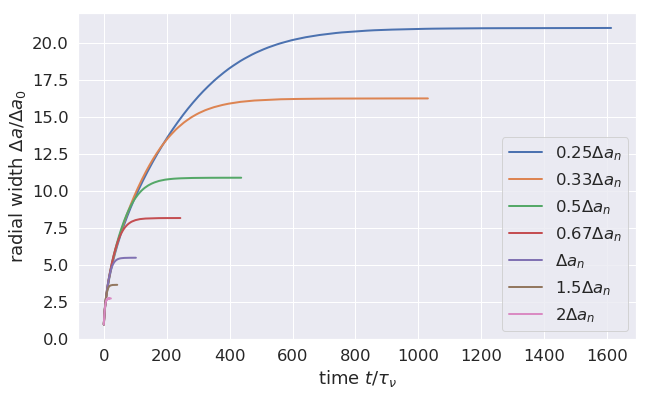

In [4]:
#plot delta_a versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = da/da[0]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

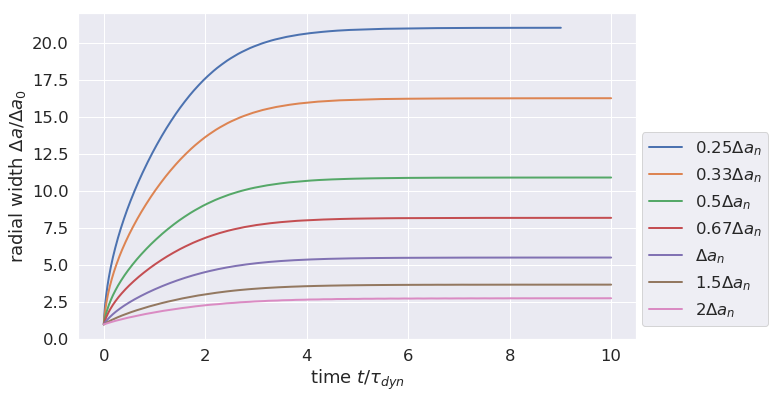

In [5]:
#plot delta_a versus times_dynamical
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_dynamical
    y = da/da[0]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = plt.legend(loc=(1.01, 0.04))

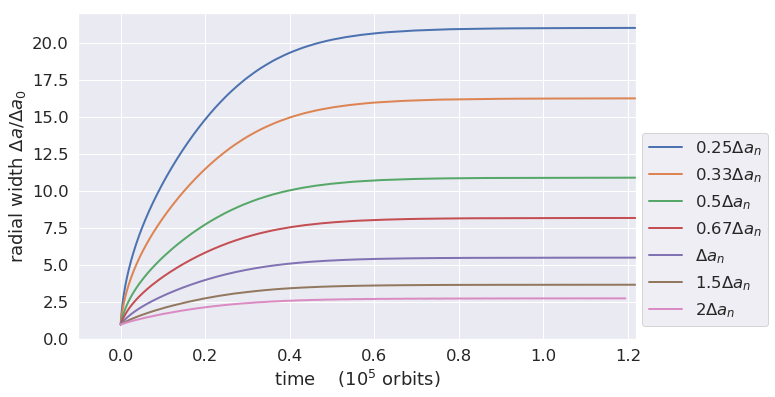

In [6]:
#plot delta_a versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times/(2*np.pi)/1.0e5
    y = da/da[0]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time    ($10^5$ orbits)')
p = ax.set_xlim(-0.1, 1.22)
p = plt.legend(loc=(1.01, 0.04))

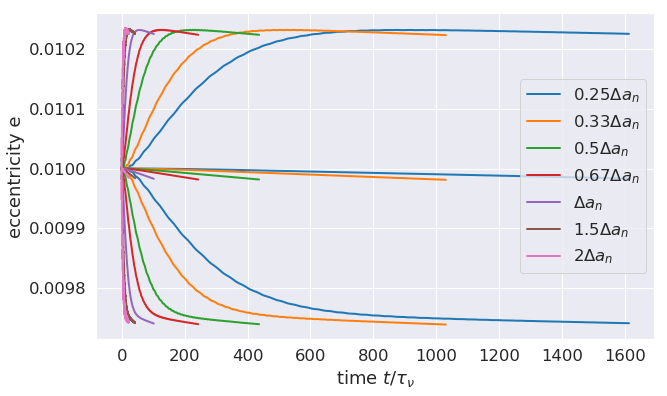

In [7]:
#plot eccentricity versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    color = color_seq[idx]
    x = times_viscous
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=labels[idx])
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center right')

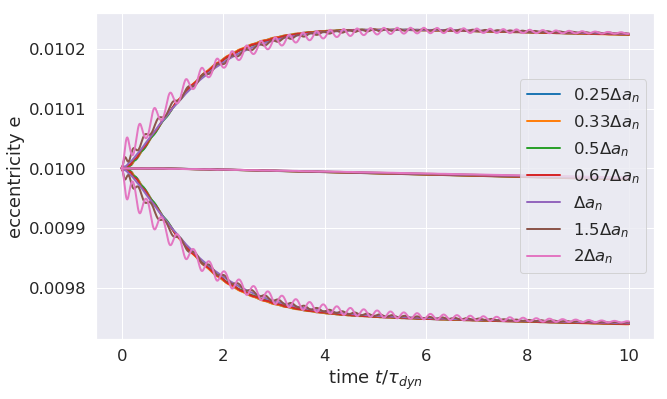

In [8]:
#plot eccentricity versus times_dynamical
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    color = color_seq[idx]
    x = times_dynamical
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=labels[idx])
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = plt.legend(loc='center right')

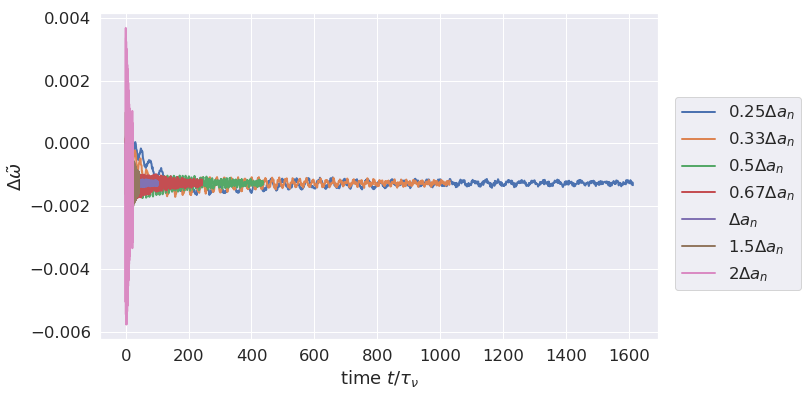

In [9]:
#plot delta_wt versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = dwt
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = plt.legend(loc=(1.03, 0.15))

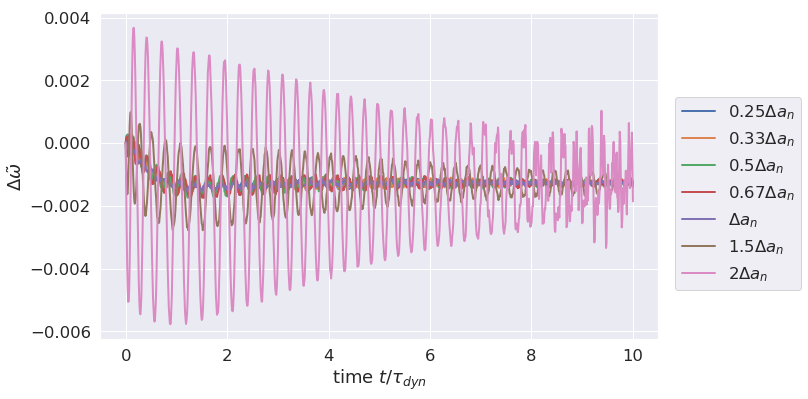

In [10]:
#plot delta_wt versus times_dynamical
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_dynamical
    y = dwt
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = plt.legend(loc=(1.03, 0.15))

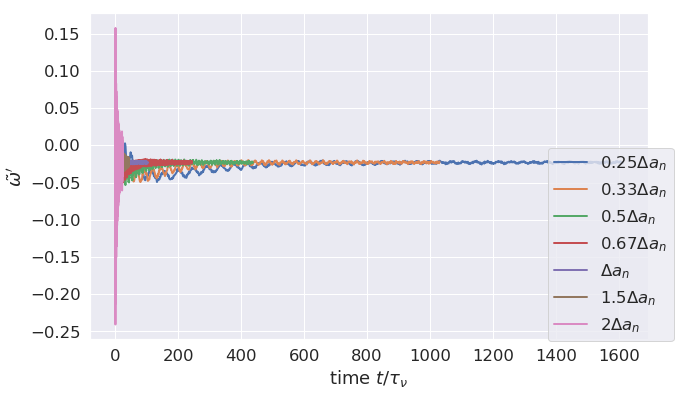

In [11]:
#plot wt_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = wt_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = plt.legend(loc=(0.82, -0.006))

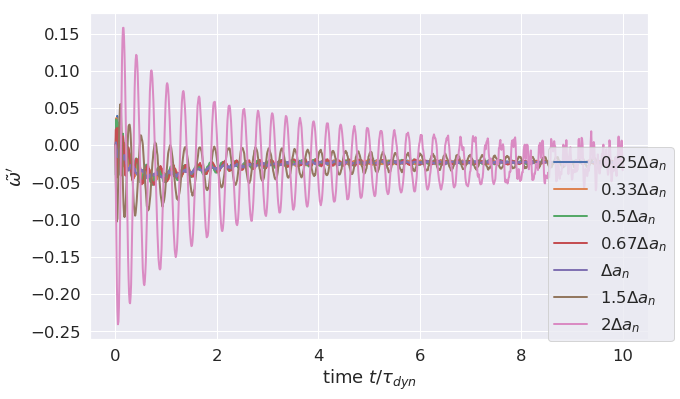

In [12]:
#plot wt_prime versus times_dynamical
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_dynamical
    y = wt_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = plt.legend(loc=(0.82, -0.006))

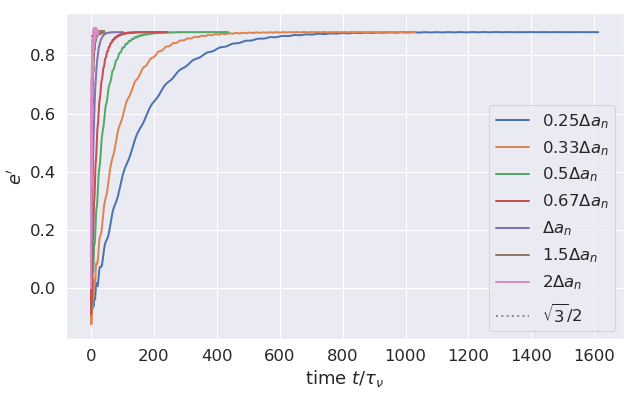

In [13]:
#plot e_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$e'$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

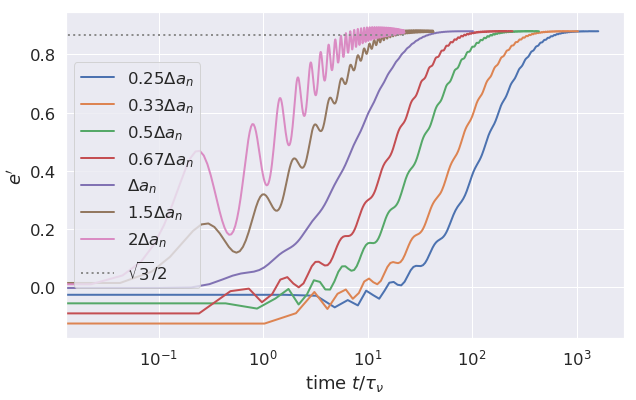

In [14]:
#plot e_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$e'$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_xscale('log')
p = plt.legend()

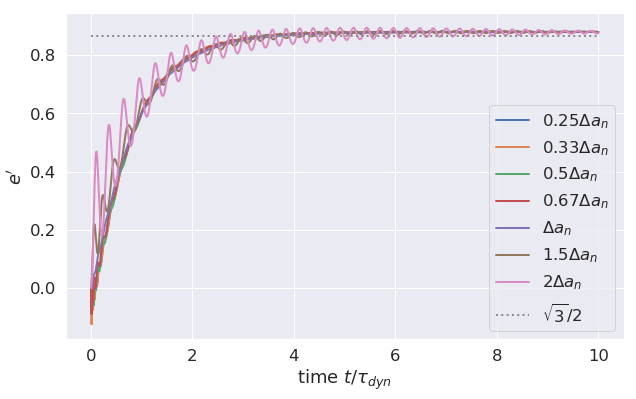

In [15]:
#plot e_prime versus times_dynamical
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_dynamical
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$e'$")
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = plt.legend()

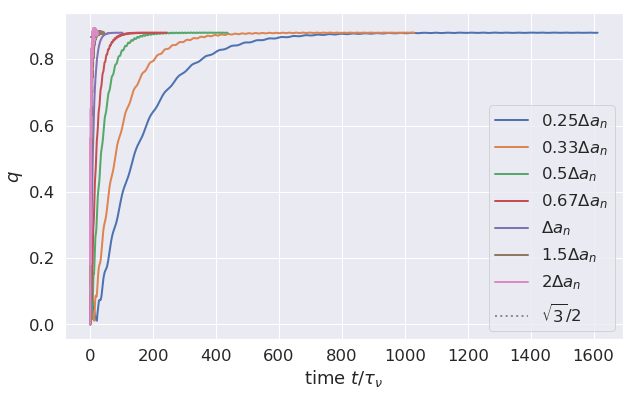

In [16]:
#plot q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$q$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

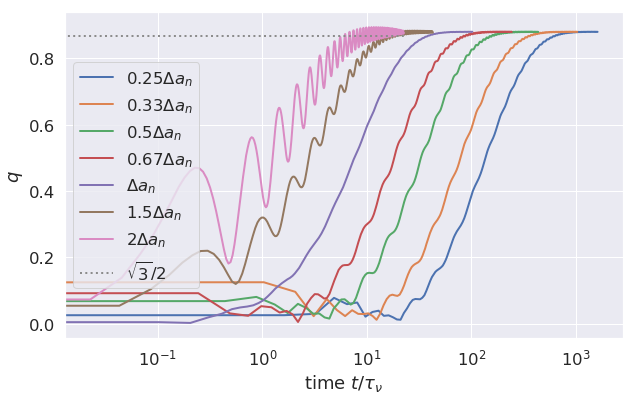

In [17]:
#plot q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_viscous
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$q$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_xscale('log')
p = plt.legend()

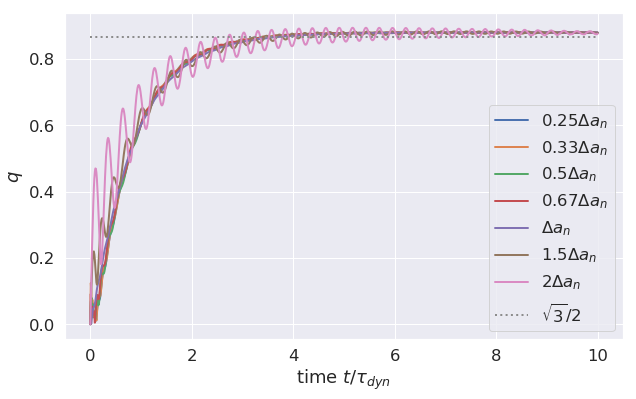

In [18]:
#plot q versus times_dynamical
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times_dynamical
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$q$")
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = plt.legend()

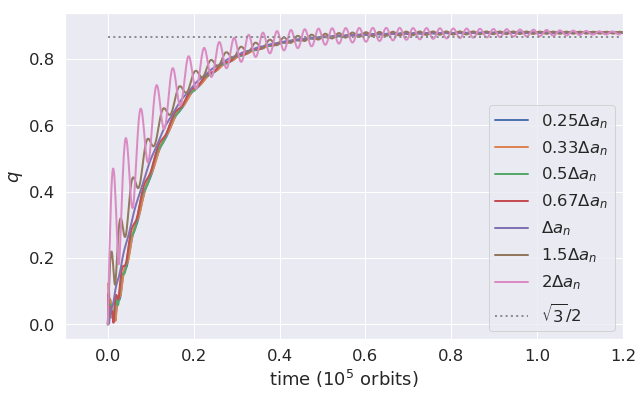

In [19]:
#plot q versus times
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x = times/(2*np.pi)/1.0e5
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$q$")
p = ax.set_xlabel(r'time ($10^5$ orbits)')
p = ax.set_xlim(-0.1, 1.2)
p = plt.legend()

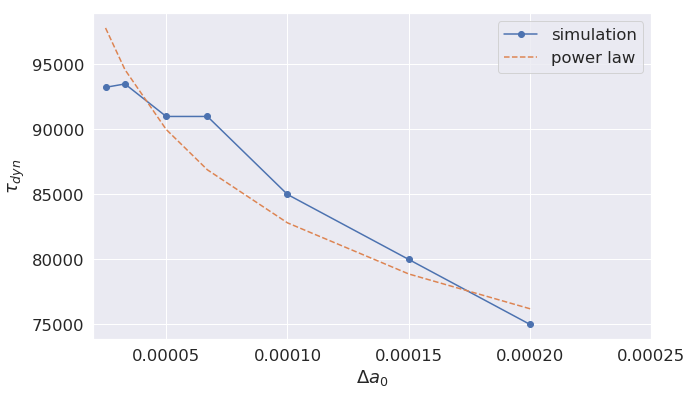

In [20]:
#plot times_dynamical versus radial_width
x = []
y = []
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, times_dynamical, dynamical_timescale, radial_width = everything[idx]
    x += [radial_width]
    y += [dynamical_timescale]
x = np.array(x)
y = np.array(y)
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', marker='o', label='simulation')
y = 9.0e4*(x/5.0e-5)**(-0.12)
p = ax.plot(x, y, linestyle='dashed', label='power law')
#p = ax.set_xscale('log')
#p = ax.set_yscale('log')
p = ax.set_xlabel(r'$\Delta a_0$')
p = ax.set_ylabel(r"$\tau_{dyn}$")
p = ax.set_xlim(2.0e-5, 2.5e-4)
#p = ax.set_ylim(7.0e4, 1.0e5)
p = ax.legend()